Challenge 4.01: Optimizing A Luxury Clothing Brand's Marketing Campaign Using Clustering

The sales team has collected data on customer age, their annual spend, and number of days since last purchase. 
The company wants to start a targeted marketing campaigns but doesnt know the different type of customers they have. 

Perform customer segmentation for the company which willl help them optimize thier campaigns. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
data0 = pd.read_csv("Datasets/Clothing_Customers.csv")
data0.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [3]:
#Standardardize all 4 columns

data_copy = data0.copy()

cols_to_scale = ['income', 'age', 'days_since_purchase','annual_spend']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_copy[cols_to_scale]= scaler.fit_transform(data_copy[cols_to_scale])

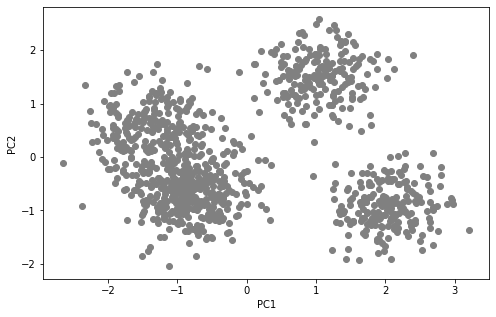

In [4]:
#Use PCA to reduce the data dimesions then visualize

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_copy[cols_to_scale])

data_copy['pc1'] = pca_res[:,0]
data_copy['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_copy.pc1, data_copy.pc2, color='gray')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

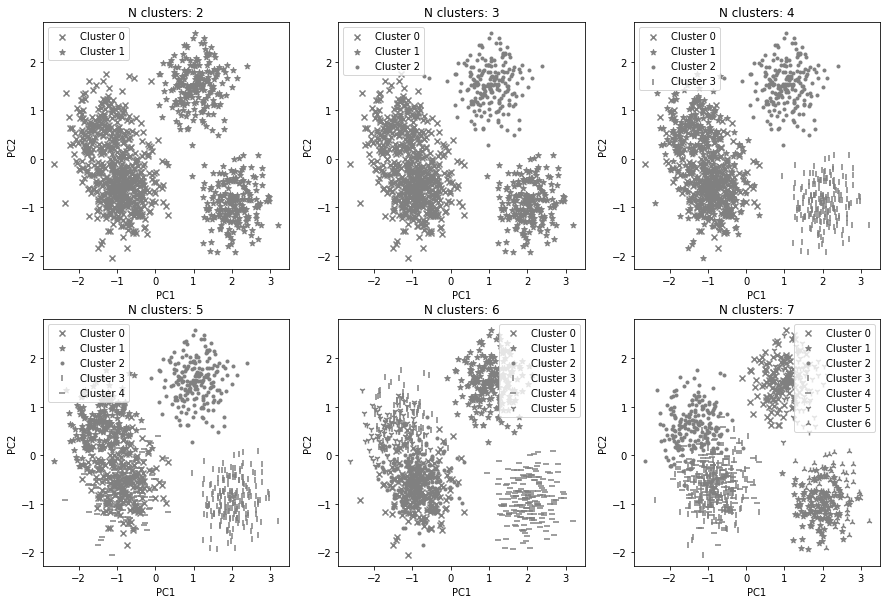

In [5]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_copy['Cluster']= model.fit_predict\
                            (data_copy[cols_to_scale])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_copy[data_copy.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust), \
                    color='gray')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.title("N clusters: "+str(n))

plt.show()

In [6]:
inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42)\
              .fit(data_copy).inertia_
    inertia_scores.append(inertia)

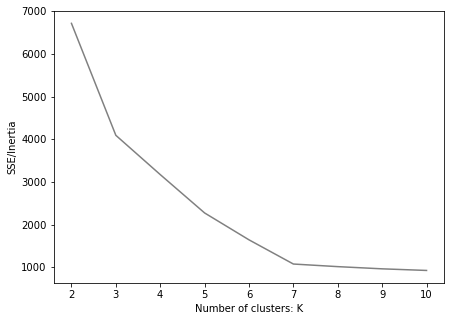

In [7]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

In [8]:
#Activity 4.02: Evaluating Clustering on Customer Data
from sklearn import cluster
from sklearn import metrics
%matplotlib inline

CO = pd.read_csv('Datasets/customer_offers.csv')

CO.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split(CO, random_state=100)

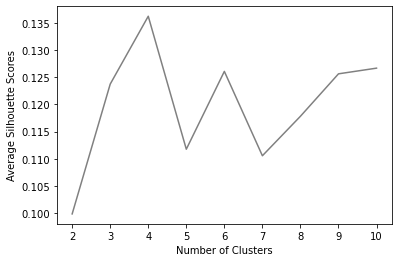

In [10]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)
    
    silhouette_avg = metrics.silhouette_score(X_train, cluster_assignments)
    
    avg_silhouettes.append(silhouette_avg)
    
plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Scores')
plt.show()

Silhouette Score k = 4.


In [12]:
#Perform a K-means clustering using k from above. 

model1 = cluster.KMeans(n_clusters=4, random_state=100)

model1.fit(X_train)

km_label = model1.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_label)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.10342688033212433


In [13]:
#perform a mean-shift Cluster.

bandwidth = cluster.estimate_bandwidth(X_train, quantile=.1)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_label = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_label)
print('mean-shift silhouette score: '+ str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


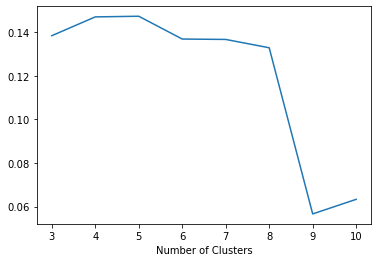

In [16]:
#perform k-modes on the data. Identify the optimal number of clusters by using silhoutte scores. 

from kmodes.kmodes import KModes

krange = list(range(3,11))
avg_silhouette = []

for n in krange:
    km = KModes(n_clusters = n, random_state = 100)
    km.fit(X_train)
    
    kmodes_label = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score(X_train, kmodes_label)
    avg_silhouette.append(kmode_silhouette)

plt.plot(krange, avg_silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel = ("Average Silhouette Score")
plt.show()

Silhouette scores = 4, 5 . We prefer the lower number of Clusters. 


In [17]:
#Using k from the silhouette above perfofrm kmodes on the Data. 

km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)

kmode_label = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score(X_test, kmode_label)

print('k-mode silhouette score: '+ str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501


Compare the silhouette scores from the 3 different techniques. 

k-means silhouette score: 0.10342688033212433

mean-shift silhouette score: 0.07308587709358311

k-mode silhouette score: 0.11750917239635501


The ideal number of customer segments is 4. 

End Challenge Activity 4.02
